In [1]:
# you won't understand much out of this but here i installed most of usefull packages to the jupyter notebook

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
import pydotplus as pydot
from sklearn import tree
from os import system

In [2]:
!pip install pydotplus

In [3]:
creditData = pd.read_csv("credit.csv")
creditData.head(10) #several missing values!

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [4]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [5]:

for feature in creditData.columns: # Loop through all columns in the dataframe
    if creditData[feature].dtype == 'object': # Only apply for columns with categorical strings
        creditData[feature] = pd.Categorical(creditData[feature])# Replace strings with an integer
creditData.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [6]:
print(creditData.checking_balance.value_counts())
print(creditData.credit_history.value_counts())
print(creditData.purpose.value_counts())
print(creditData.savings_balance.value_counts())
print(creditData.employment_duration.value_counts())
print(creditData.other_credit.value_counts())
print(creditData.housing.value_counts())
print(creditData.job.value_counts())
print(creditData.phone.value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
none     814
bank     139
store     47
Name: other_credit, dtype: int64
own      713
rent     179
other    108
Name: housing, dtype: int64
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
no     596
yes    404
Name: phone, dtype: int64


In [7]:
replaceStruct = {
                "checking_balance":     {"< 0 DM": '1', "1 - 200 DM": '2' ,"> 200 DM": '3',"unknown":'-1'},
                "credit_history": {"critical": 1, "poor":2 , "good": 3, "very good": 4,"perfect": 5},
                 "savings_balance": {"< 100 DM": 1, "100 - 500 DM":2 , "500 - 1000 DM": 3, "> 1000 DM": 4,"unknown": -1},
                 "employment_duration":     {"unemployed": 1, "< 1 year": 2 ,"1 - 4 years": 3 ,"4 - 7 years": 4 ,"> 7 years": 5},
                "phone":     {"no": 1, "yes": 2 },
                #"job":     {"unemployed": 1, "unskilled": 2, "skilled": 3, "management": 4 },
                "default":     {"no": 0, "yes": 1 } 
                    }


#those features with NO order in their categories                   
oneHotCols=["purpose","housing","other_credit","job"]


In [8]:
replaceStruct

{'checking_balance': {'< 0 DM': '1',
  '1 - 200 DM': '2',
  '> 200 DM': '3',
  'unknown': '-1'},
 'credit_history': {'critical': 1,
  'poor': 2,
  'good': 3,
  'very good': 4,
  'perfect': 5},
 'savings_balance': {'< 100 DM': 1,
  '100 - 500 DM': 2,
  '500 - 1000 DM': 3,
  '> 1000 DM': 4,
  'unknown': -1},
 'employment_duration': {'unemployed': 1,
  '< 1 year': 2,
  '1 - 4 years': 3,
  '4 - 7 years': 4,
  '> 7 years': 5},
 'phone': {'no': 1, 'yes': 2},
 'default': {'no': 0, 'yes': 1}}

In [9]:
n = pd.DataFrame.from_dict(replaceStruct)

In [10]:
creditData = creditData.replace(n)

In [11]:
creditData.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1,6,1.0,furniture/appliances,1169,-1.0,5.0,4,4,67,none,own,2,skilled,1,2.0,0.0
1,2,48,3.0,furniture/appliances,5951,1.0,3.0,2,2,22,none,own,1,skilled,1,1.0,1.0
2,-1,12,1.0,education,2096,1.0,4.0,2,3,49,none,own,1,unskilled,2,1.0,0.0
3,1,42,3.0,furniture/appliances,7882,1.0,4.0,2,4,45,none,other,1,skilled,2,1.0,0.0
4,1,24,2.0,car,4870,1.0,3.0,3,4,53,none,other,2,skilled,2,1.0,1.0


In [12]:
creditData.dtypes

checking_balance        category
months_loan_duration       int64
credit_history          category
purpose                 category
amount                     int64
savings_balance         category
employment_duration     category
percent_of_income          int64
years_at_residence         int64
age                        int64
other_credit            category
housing                 category
existing_loans_count       int64
job                     category
dependents                 int64
phone                   category
default                 category
dtype: object

In [13]:
cat_columns = creditData.select_dtypes(['category']).columns

creditData[cat_columns] = creditData[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [14]:
x = creditData.drop('default',axis=1)
y = creditData.pop('default')

In [15]:
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size =0.30 , random_state=1)

In [16]:
mod = DecisionTreeClassifier(criterion='gini',random_state=1)

In [17]:
mod.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [18]:
import pydotplus as pydot

In [19]:
pydot_graphs = pydot.graph_from_dot_file("credit_tree.dot")

FileNotFoundError: [Errno 2] No such file or directory: 'credit_tree.dot'

In [20]:
dt = tree.DecisionTreeClassifier()
dt = mod.fit(x,y)
dt_graphviz = tree.export_graphviz(dt, out_file = None)

pydot_graph = pydot.graph_from_dot_data(dt_graphviz)


(process:4424): GLib-GIO-WARNING **: 10:01:46.463: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2303.17.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:4424): GLib-GIO-WARNING **: 10:01:46.560: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.6.0.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



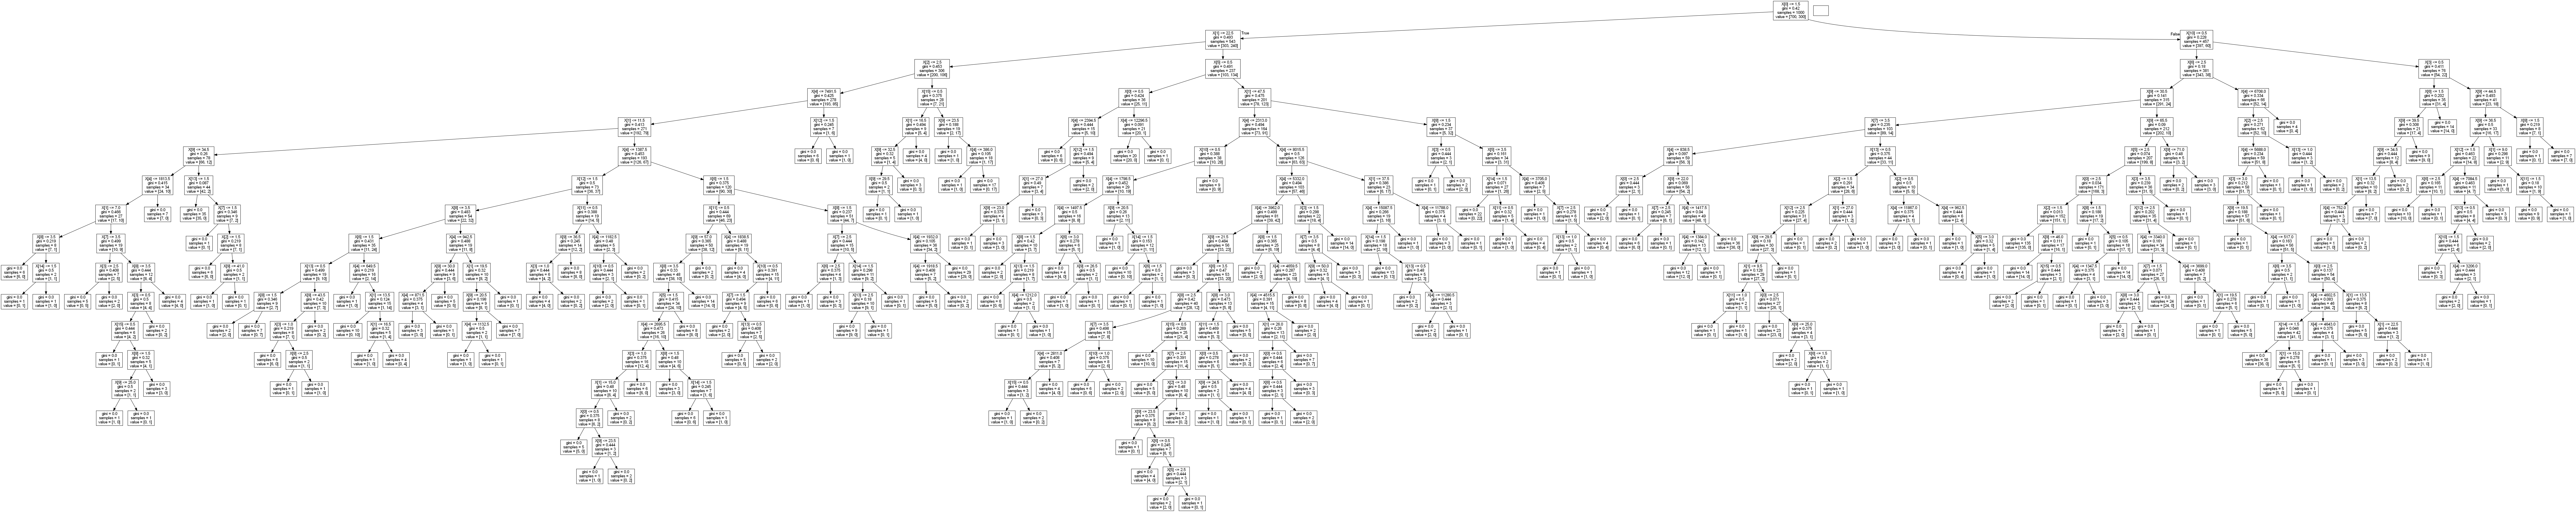

In [21]:
from IPython.display import Image

Image(pydot_graph.create_png())